# importing needed libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

# importing dataset

In [45]:
df = pd.read_csv('penguins.csv')

# exploring data

In [46]:
df.head()  

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [48]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [49]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

# handling null_values

In [50]:
df.dropna(inplace=True)

In [51]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# doing some data preprocessing

## feature selection

In [52]:
selected_features = ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']
df = df[selected_features]

## feature encoding

In [53]:
print(df)

    species     island  bill_length_mm  bill_depth_mm  body_mass_g
0    Adelie  Torgersen            39.1           18.7       3750.0
1    Adelie  Torgersen            39.5           17.4       3800.0
2    Adelie  Torgersen            40.3           18.0       3250.0
4    Adelie  Torgersen            36.7           19.3       3450.0
5    Adelie  Torgersen            39.3           20.6       3650.0
..      ...        ...             ...            ...          ...
338  Gentoo     Biscoe            47.2           13.7       4925.0
340  Gentoo     Biscoe            46.8           14.3       4850.0
341  Gentoo     Biscoe            50.4           15.7       5750.0
342  Gentoo     Biscoe            45.2           14.8       5200.0
343  Gentoo     Biscoe            49.9           16.1       5400.0

[333 rows x 5 columns]


In [54]:
categorical_features = ['species', 'island']
encoder = OneHotEncoder(drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_features]).toarray(),
                                columns=encoder.get_feature_names_out(categorical_features))
df.drop(categorical_features, axis=1, inplace=True)
df = pd.concat([df, encoded_features], axis=1)

## feature scaling

In [55]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('body_mass_g', axis=1))
df[df.columns[:-1]] = scaled_features
df.dropna(inplace=True)


## data splitting

In [56]:
X = df.drop("body_mass_g", axis=1)
print(X)
y = df["body_mass_g"]
y = y.astype('category')

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


     bill_length_mm  bill_depth_mm  species_Chinstrap  species_Gentoo  \
0         -0.896042       0.780732          -0.745704        -0.76532   
1         -0.822788       0.119584          -0.745704        -0.76532   
2         -0.676280       0.424729          -0.745704        -0.76532   
4         -1.335566       1.085877          -0.745704        -0.76532   
5         -0.859415       1.747026          -0.745704        -0.76532   
..              ...            ...                ...             ...   
328       -0.126875      -1.609573           1.341014        -0.76532   
329        0.752174      -1.050140           1.341014        -0.76532   
330        1.191698      -0.999282           1.341014        -0.76532   
331        1.063503      -0.643279           1.341014        -0.76532   
332       -0.090248      -0.999282           1.341014        -0.76532   

     island_Dream  island_Torgersen  
0        2.466801               1.0  
1        2.466801               1.0  
2        

In [57]:
X_train.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
species_Chinstrap    0
species_Gentoo       0
island_Dream         0
island_Torgersen     0
dtype: int64

In [58]:
X_test.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
species_Chinstrap    0
species_Gentoo       0
island_Dream         0
island_Torgersen     0
dtype: int64

# showing data

In [59]:
print(df.head())

   bill_length_mm  bill_depth_mm  body_mass_g  species_Chinstrap  \
0       -0.896042       0.780732    -0.506561          -0.745704   
1       -0.822788       0.119584    -0.506561          -0.745704   
2       -0.676280       0.424729    -0.506561          -0.745704   
4       -1.335566       1.085877    -0.506561          -0.745704   
5       -0.859415       1.747026    -0.506561          -0.745704   

   species_Gentoo  island_Dream  island_Torgersen  
0        -0.76532      2.466801               1.0  
1        -0.76532      2.466801               1.0  
2        -0.76532      2.466801               1.0  
4        -0.76532      2.466801               1.0  
5        -0.76532      2.466801               1.0  


In [60]:
df_test = df
df_test['species'] = df_test.index


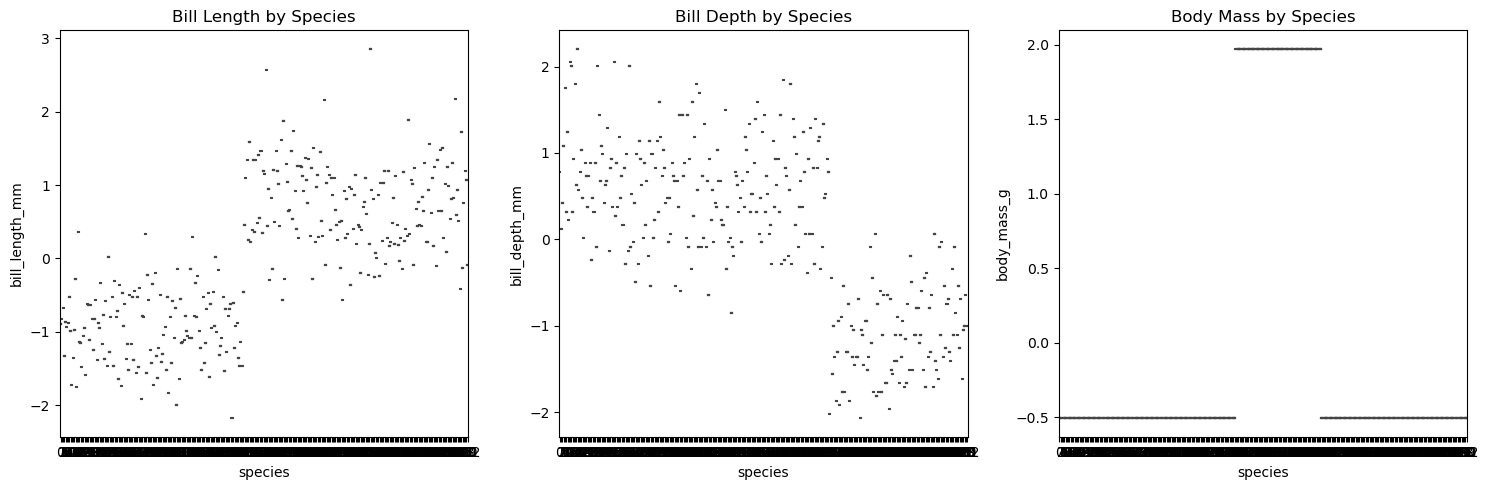

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(ax=axes[0], x='species', y='bill_length_mm', data=df_test)
axes[0].set_title('Bill Length by Species')
sns.boxplot(ax=axes[1], x='species', y='bill_depth_mm', data=df_test)
axes[1].set_title('Bill Depth by Species')
sns.boxplot(ax=axes[2], x='species', y='body_mass_g', data=df_test)
axes[2].set_title('Body Mass by Species')
plt.tight_layout()
plt.show()

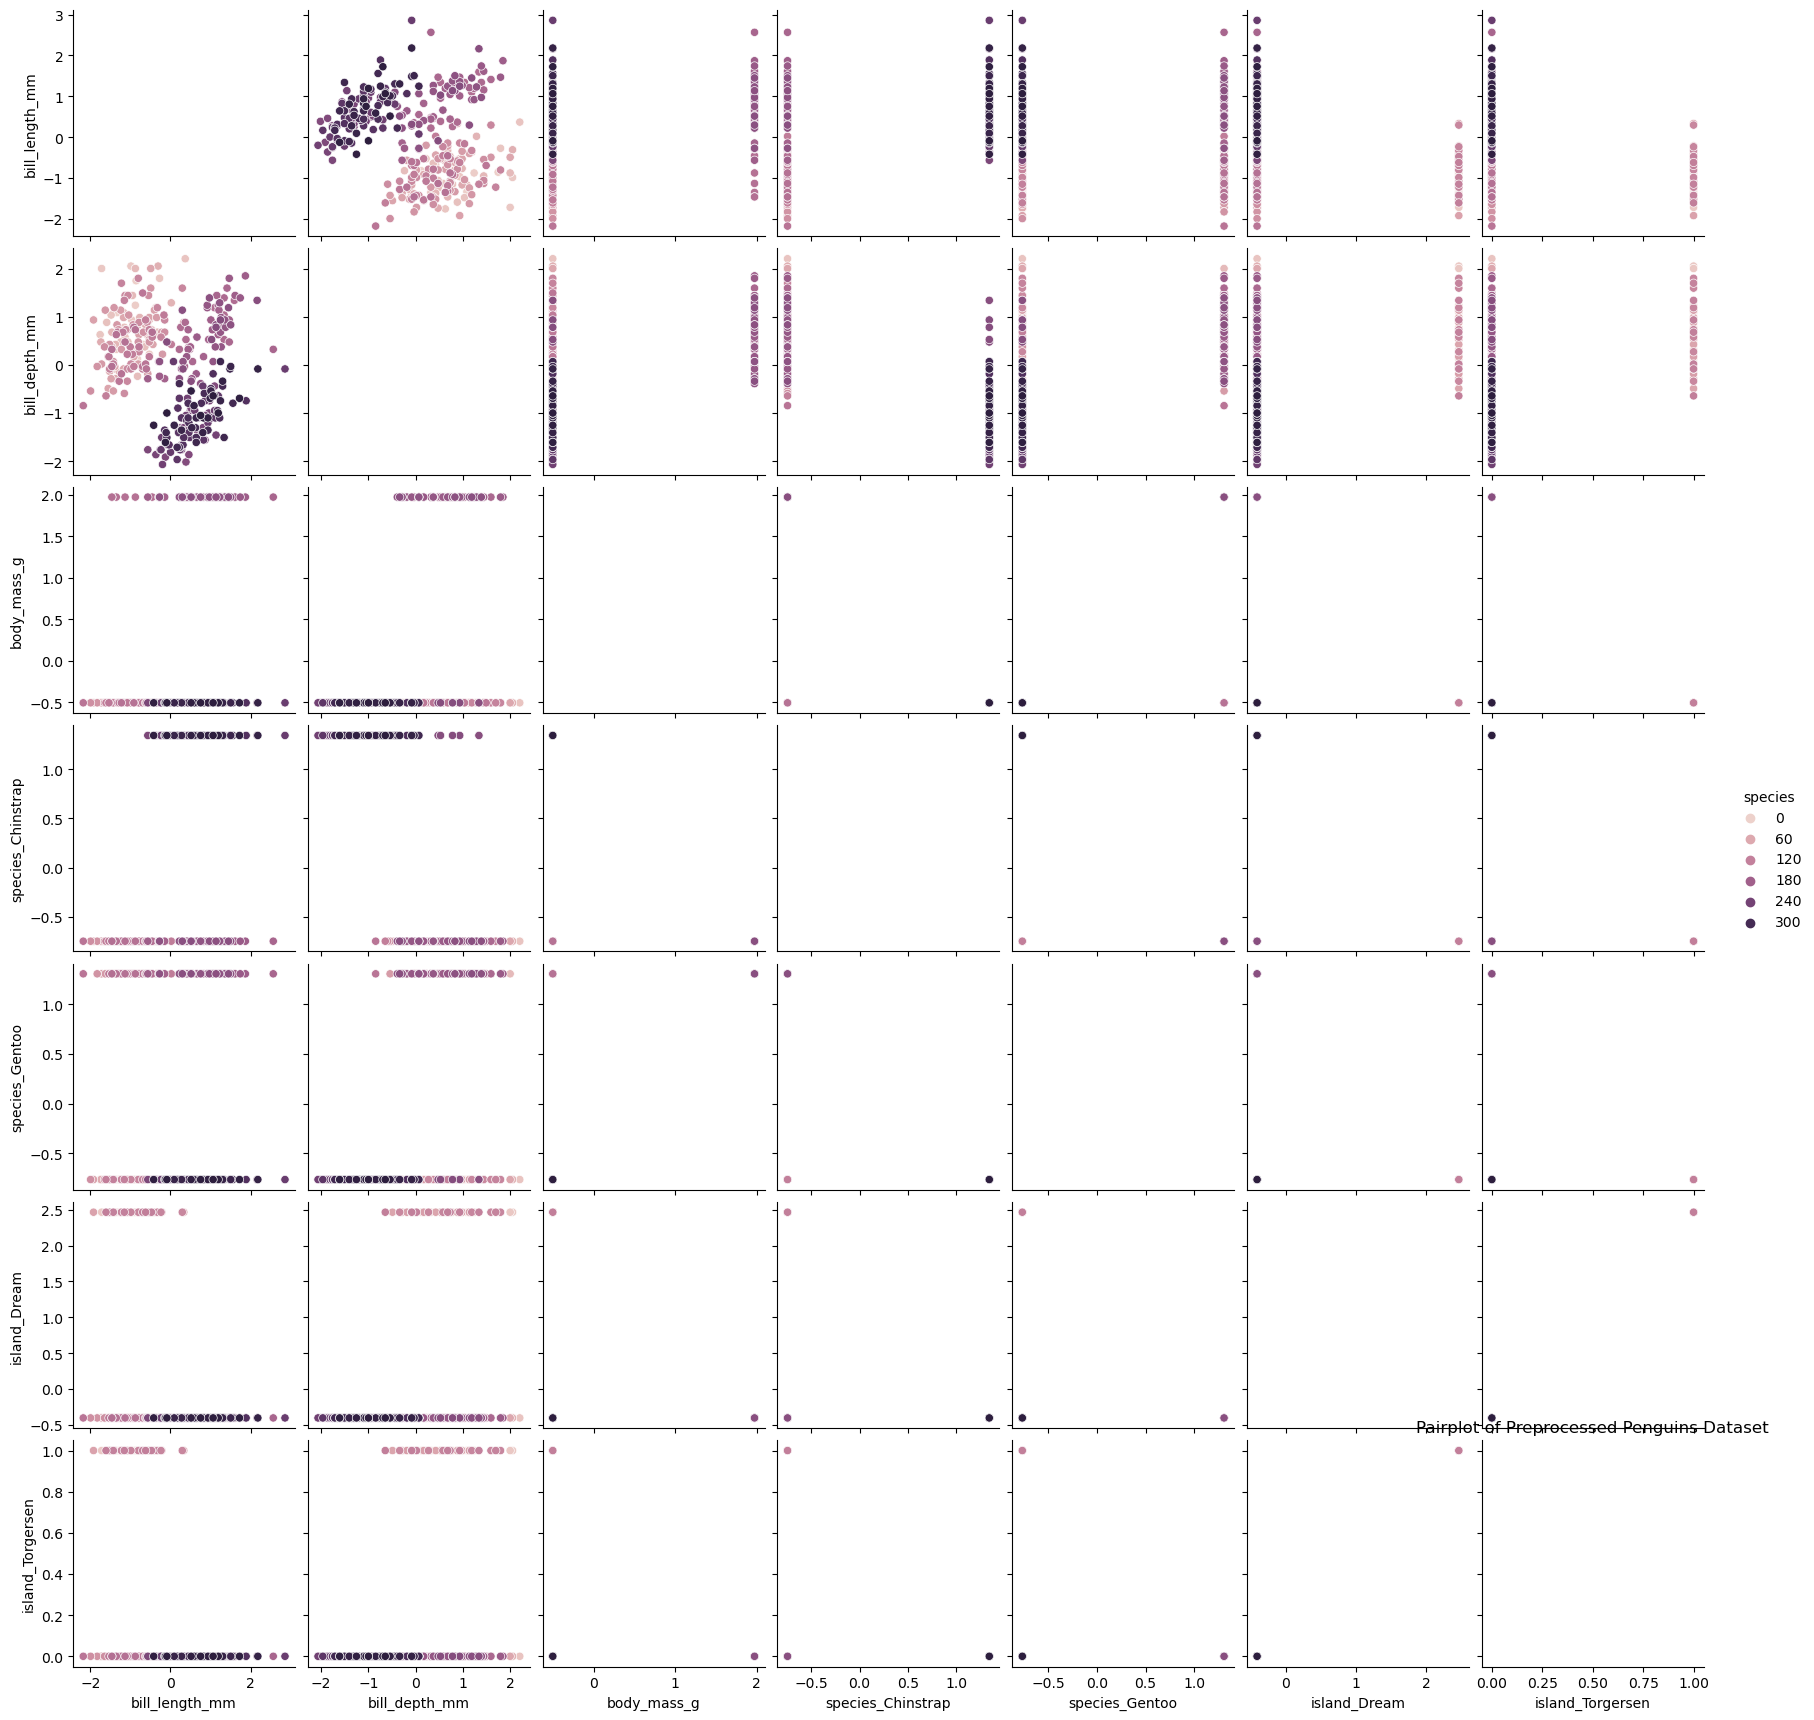

In [62]:
sns.pairplot(df_test, hue='species')
plt.title('Pairplot of Preprocessed Penguins Dataset')
plt.show()

C:\Users\katti\AppData\Local\Temp\ipykernel_10108\2632315391.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


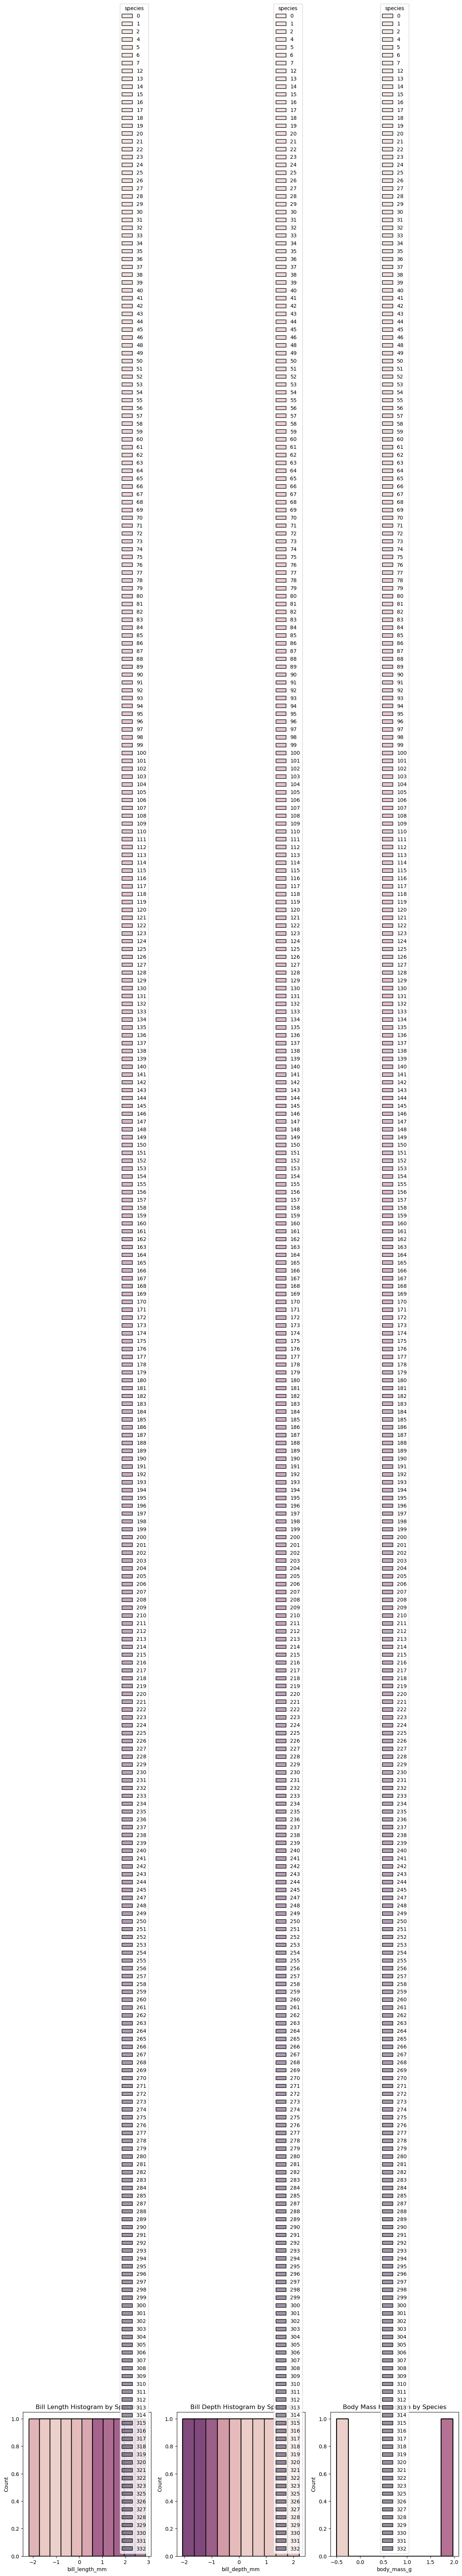

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(ax=axes[0], x='bill_length_mm', data=df, hue='species', kde=True)
axes[0].set_title('Bill Length Histogram by Species')
sns.histplot(ax=axes[1], x='bill_depth_mm', data=df, hue='species', kde=True)
axes[1].set_title('Bill Depth Histogram by Species')
sns.histplot(ax=axes[2], x='body_mass_g', data=df, hue='species', kde=True)
axes[2].set_title('Body Mass Histogram by Species')
plt.tight_layout()
plt.show()

# implementing bagging classifier

In [64]:
class BaggingClassifier:
    def __init__(self, base_model, n_estimators=10, max_samples=1.0, random_state=None):
        self.base_model = base_model
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.random_state = random_state
        self.estimators = []

    def fit(self, X, y):
        self.estimators = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = resample(X, y, n_samples=int(self.max_samples * len(X)),
                                          random_state=self.random_state, stratify=y)
            estimator = self.base_model.fit(X_sample, y_sample)
            self.estimators.append(estimator)

    def predict(self, X):
        predictions = []
        for estimator in self.estimators:
            prediction = estimator.predict(X)
            predictions.append(prediction)
        predictions = np.array(predictions)
        return np.round(np.mean(predictions, axis=0))

# Train and evaluate the Bagging Classifier

In [65]:
base_model = DecisionTreeClassifier()
bagging = BaggingClassifier(base_model=base_model, n_estimators=10, max_samples=0.8, random_state=42)

bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9538461538461539
